## **IMPORTS**

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%%capture
%run logistic_regression.ipynb
%run knn.ipynb
%run decision_tree.ipynb
%run random_forests.ipynb

## **MODEL COMPARISON**

In questa sezione, andremo a confrontare i risultati ottenuti dai vari modelli, al fine di stabilire qual è il **migliore** per l'obiettivo dell'analisi.

Con **model_metrics_df**, andiamo a creare un dataframe che riporta, per ciascun modello (**Regressione Logistica**, **K-Neares Neighbours**, **Decision Tree** e **Random Forests**), le seguenti metriche:
- **Test Accuracy**
- **Recall**
- **F1-score**
- **Specificity**
- **AUC-ROC**
- **Indice di Gini**

In [13]:
model_comparison_df = classification_model.model_metrics_df(
    ['Logistic Regression', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forests'],
    [log_reg_test_accuracy2, knn_test_accuracy, dt_test_accuracy2, rf_test_accuracy],
    [log_reg_recall2, knn_recall, dt_recall, rf_recall],
    [log_reg_f12, knn_f1, dt_f1, rf_f1],
    [log_reg_specificity2, knn_specificity, dt_specificity, rf_specificity],
    [log_reg_auc2, knn_auc, dt_auc, rf_auc],
    [log_reg_gini2, knn_gini, dt_gini, rf_gini]
)

Con **model_comparison_barplot**, visualizziamo tramite barplot il confronto tra i modelli.

<Figure size 1200x800 with 0 Axes>

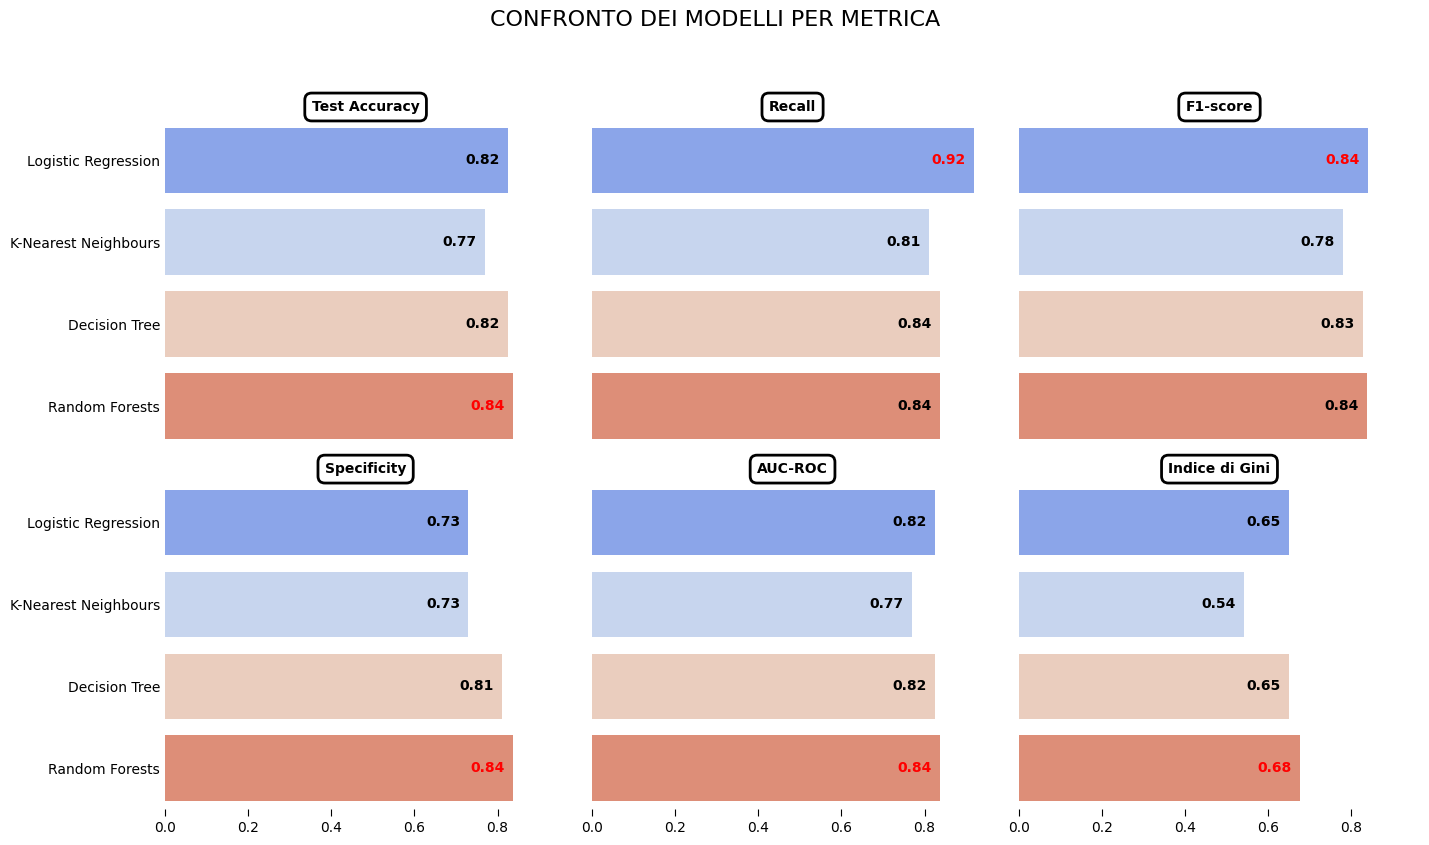

In [14]:
visualization.model_comparison_barplot(model_comparison_df)